# Financial Transaction Fraud Detection - Exploratory Data Analysis

This notebook presents an exploratory data analysis of financial transactions to identify patterns and characteristics of fraudulent activities.

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the dataset
df = pd.read_csv('../data/raw/financial_transaction.csv', usecols=lambda col: col not in ['isFlaggedFraud', 'step'])

## Data Overview
Examining the basic characteristics and quality of our dataset.

In [23]:
# Display the first few rows of the dataframe
df.info()
df.head()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   nameOrig        object 
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        object 
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 436.9+ MB


,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [5]:
df.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

## Transaction Analysis
Analyzing transaction patterns and their relationship with fraudulent activities.

In [4]:
# Data Validation 
df['newbalanceOrig'] = df['oldbalanceOrg'] - df['amount']
df['newbalanceDest'] = df['oldbalanceDest'] + df['amount']

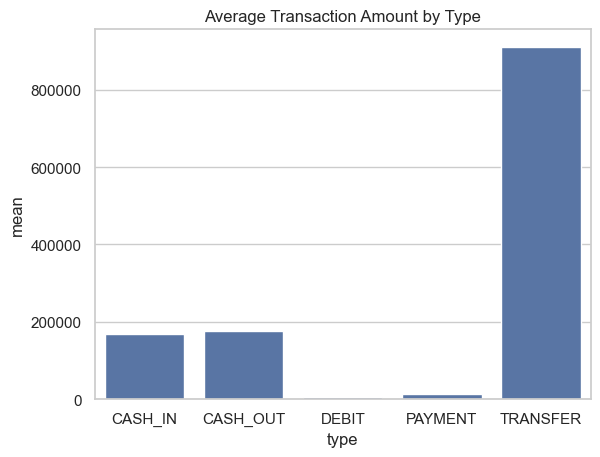

In [ ]:
# Average Transaction Types
transaction_type = df.groupby('type')['amount'].agg({'mean'}).round(2)
sns.barplot(x=transaction_type.index, y=transaction_type['mean'])
plt.title('Average Transaction Amount by Type')
plt.show()

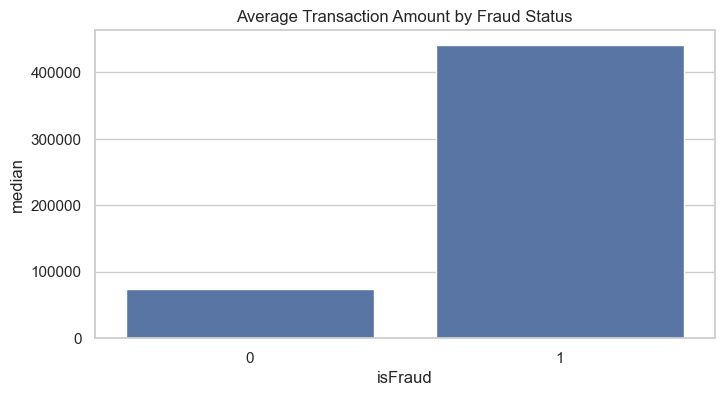

In [ ]:
# Distribution of fraudulent transactions
plt.figure(figsize=(8, 4))
fraud = df.groupby('isFraud')['amount'].agg({'mean', 'median'}).round(2)
sns.barplot(x=fraud.index, y=fraud['median'])
plt.title('Average Transaction Amount by Fraud Status')
plt.show()

<Axes: title={'center': 'Common Transaction Types for Fraudulent Transactions'}, xlabel='Transaction Type', ylabel='Number of Fraudulent Transactions'>

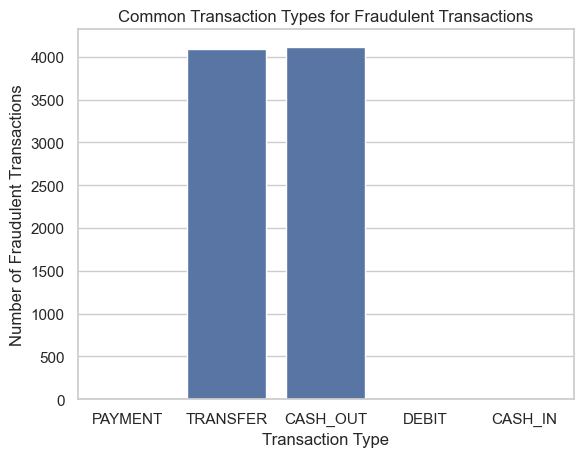

In [20]:
plt.title('Common Transaction Types for Fraudulent Transactions')
plt.ylabel('Number of Fraudulent Transactions')
plt.xlabel('Transaction Type')
sns.barplot(x='type', y='isFraud', data=df, estimator=np.sum, errorbar=None)

The figure above shows that most fraudulent transactions in the dataset predominantly occur through transfer and cash out transaction types.

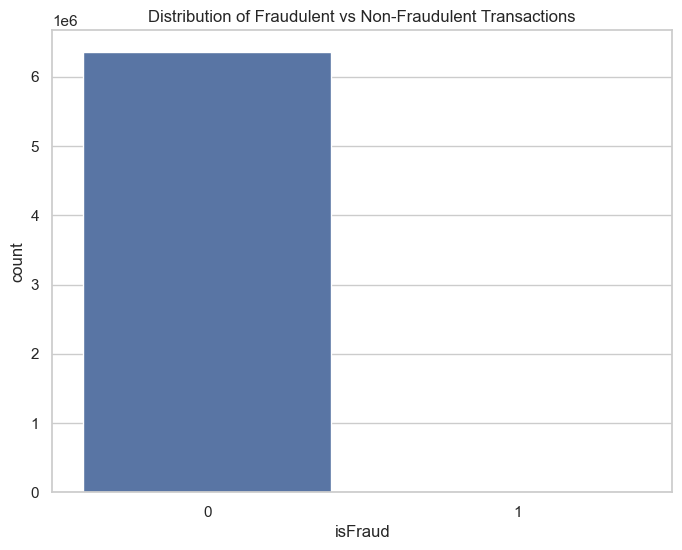

Fraud rate: 0.13%


In [10]:
# Visualize fraud distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='isFraud')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

# Calculate fraud rate
fraud_rate = df['isFraud'].mean() * 100
print(f"Fraud rate: {fraud_rate:.2f}%")

In [11]:
# Transaction frequency by type and fraud status
pd.crosstab(df['type'], df['isFraud'], 
            normalize='index').round(4) * 100

isFraud,0,1
type,,
CASH_IN,100.00,0.00
CASH_OUT,99.82,0.18
DEBIT,100.00,0.00
PAYMENT,100.00,0.00
TRANSFER,99.23,0.77
